In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

import sweetviz as sv


''' 
This file contains data about flights leaving from JKF ariport between Nov 2019-Dec-2020 
Let's start by figuring out what all the column names represent
- month, day of month, day of week -> when the flight left
- op unique carrier -> the operating carrier i.e. airline/operating/carrier company
- tail_num -> airflight number, identifies the plane
- dest -> destination 
- dep_delay -> departure delay
- crs_elapsed_time -> elapsed time of the flight
- distance -> distance travelled
- crs_dep_m, crs_time_m -> schjeduled and actual depature times (latter represents gate checkout not take off)
- crs_arr_m -> scheduled arrival time
- temp -> temperature
- dew point 
- humidity
- wind
- wind speed
- wind gust
- pressure
- condition -> weather 
- sch_dep -> no of flights scheduled for arrival
- sch_arr -> no of flights schedules for departure (surely these are the wrong way round??)
- taxi_out -> time from leaving the gate to take off and the dependent variable we want to analyse 
'''

" \nThis file contains data about flights leaving from JKF ariport between Nov 2019-Dec-2020 \nLet's start by figuring out what all the column names represent\n- month, day of month, day of week -> when the flight left\n- op unique carrier -> the operating carrier i.e. airline/operating/carrier company\n- tail_num -> airflight number, identifies the plane\n- dest -> destination \n- dep_delay -> departure delay\n- crs_elapsed_time -> elapsed time of the flight\n- distance -> distance travelled\n- crs_dep_m, crs_time_m -> schjeduled and actual depature times (latter represents gate checkout not take off)\n- crs_arr_m -> scheduled arrival time\n- temp -> temperature\n- dew point \n- humidity\n- wind\n- wind speed\n- wind gust\n- pressure\n- condition -> weather \n- sch_dep -> no of flights scheduled for arrival\n- sch_arr -> no of flights schedules for departure (surely these are the wrong way round??)\n- taxi_out -> time from leaving the gate to take off and the dependent variable we wan

In [2]:
## import data
pd.set_option('display.max_columns', None)
flights_data = pd.read_csv('M1_final.csv')
flights_data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [3]:
## Check if data is being read as the appropriate type
flights_data.info()

## we can see dew point is being read as an object instead of an int
flights_data[ 'Dew Point' ] = flights_data['Dew Point'].astype('int64')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [4]:
## Get a look at count, mean, std, min, max etc
flights_data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,30.420819,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,12.314083,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [5]:
## Let's consider what could affect the taxi_out time - weather - condition/dew point/temp? number of flights leaving on the day? 

## Try out the sweetviz function for quick visualisation of data against taxi out - note that this creates an html file that opens in the default browser and so will not be seen here 

report = sv.analyze(flights_data, target_feat='TAXI_OUT')
report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
## We can see a high correlation to no of flights leaving (sch_dep), carrier, condition, destination

## dep variable (y) is the taxi_out time - presumably in minutes?
y = flights_data.iloc[:, 22].values.reshape(-1,1)

## let's take sch_dep as the indep variable (X)
X = flights_data.iloc[:, -3].values.reshape(-1,1)



In [7]:
## Fit the line with y as the taxi_out time and X as the no of flights departing the airport
## LinearRegression refers to the most ordinary least square linear regression method without regularization (penalty on weights)
LR = LinearRegression()
LR.fit(X, y)

## Predict based on trained data using OLS
y_pred = LR.predict(X)

pred_df = pd.DataFrame( { 
    'Actual_taxi_out_time':y.flatten(),
    'Predicted_taxi_out_time': y_pred.flatten()
})

pred_df

,Actual_taxi_out_time,Predicted_taxi_out_time
0,14,17.832906
1,15,17.832906
2,22,17.832906
3,12,17.832906
4,13,17.832906
...,...,...
28815,19,19.339489
28816,22,19.202527
28817,21,19.202527
28818,13,19.202527


In [17]:
## We can also try Lasso or Ridge, which is Linear Regression with penalties according to alpha coefficients

model_lasso = Lasso(alpha=0.10) ##this has defined the Lasso model
model_lasso.fit(X, y) # this uses the model on our values X and y
pred_y_lasso = model_lasso.predict(X) # this gives us the predicted value of y according to X in the lasso linear regression model

lasso_df = pd.DataFrame({
    'Actual taxi out':y.flatten(),
    'Predicted taxi out':pred_y_lasso.flatten()
})

lasso_df

,Actual taxi out,Predicted taxi out
0,14,17.857332
1,15,17.857332
2,22,17.857332
3,12,17.857332
4,13,17.857332
...,...,...
28815,19,19.351752
28816,22,19.215896
28817,21,19.215896
28818,13,19.215896


In [23]:
##Let's also try out Ridge

model_ridge = Ridge(alpha=0.01) ## define the Ridge model 
model_ridge.fit(X, y) # fit the model to our data 
pred_y_ridge = model_ridge.predict(X) #predict the y data according to our X

ridge_df = pd.DataFrame({
    'Actual taxi out':y.flatten(),
    'Predicted taxi out':pred_y_ridge.flatten()
})

ridge_df

,Actual taxi out,Predicted taxi out
0,14,17.832906
1,15,17.832906
2,22,17.832906
3,12,17.832906
4,13,17.832906
...,...,...
28815,19,19.339489
28816,22,19.202527
28817,21,19.202527
28818,13,19.202527


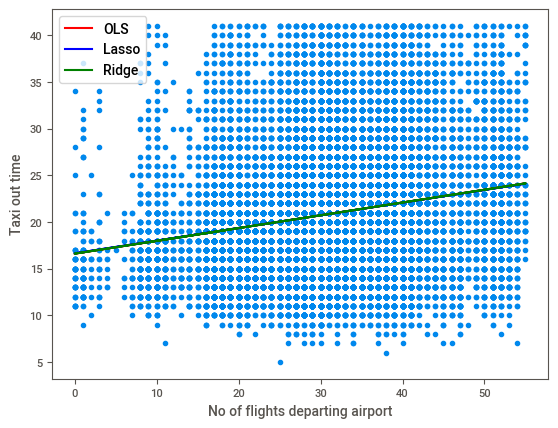

In [24]:
## plot scatter plot
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', label='OLS')
plt.plot(X, pred_y_lasso, color='blue', label='Lasso')
plt.plot(X, pred_y_ridge, color='green', label='Ridge')

plt.xlabel('No of flights departing airport')
plt.ylabel('Taxi out time')
plt.legend()
plt.show()

In [ ]:
## These are just simple linear regressions using one predictor value - no of scheduled departures
## I would also like to do a multiple linear regression looking at more values
## I would like to read into one hot and label encoding and how to convert the categorical values into numerical values, and then use these within the multiple linear regression 